# Valid POIs Analysis - HOT OSM 

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt

from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot

output_notebook()

os.chdir("/home/tales/dev/master/mdc_analysis/")
print("working dir", os.getcwd())

import gc

Loading BokehJS ...

working dir /home/tales/dev/master/mdc_analysis


In [2]:
data = pd.read_csv("/home/tales/dev/master/hot_osm_analysis/planet_osm_point.csv", sep="{")
data = data.set_index("osm_id")
print(len(data))
data.sample(6)

/home/tales/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,4,6,7,9,11,13,14,17,18,20,22,23,25,26,27,30,31,32,33,35,37,38,39,41,45,48,50,51,52,54,55,57,58,61,62,63,64,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


314877


,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,barrier,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
osm_id,,,,,,,,,,,,,,,,,,,,,
3735990913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D0066666666FD762441EC51B89EE832...
5047664767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cafe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D0052B81E85988C2C41000000D0ACEB...
3293297508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D00295C8F42EF3A2941C3F5286C00A2...
1336813303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,information,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D00D7A370BD610E2D41B81E853B6703...
2571894514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D00E17A146E12433041A4703D3A0424...
4092101689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_box,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D00713D0AD714D52F41CDCCCC5C78EE...


# Looking for places' type

Can't find places such as "park" in amenity column 

In [3]:
def frequency_values(column, show_n_bars=30, show_n_head=15):
    print("( " + column.name.upper() + " )")
    print("{} valid values".format(column.count()))
    print()
    print(column.value_counts().head(show_n_head))
    f, ax = plt.subplots(figsize=(15,3))
    column.value_counts().head(show_n_bars).plot.bar(title="Value frequency at column: {}".format(column.name.upper()))

In [4]:
valid_values = []

for column in data.columns.tolist():
    valid_values.append({"column": column, "valid_values": data[column].count()})

In [5]:
valid_values = pd.DataFrame(valid_values).sort_values(by="valid_values", ascending=False)
valid_values["prop"] = round(valid_values["valid_values"] / len(data), 3)
valid_values.head(40)

,column,valid_values,prop
68,way,314875,1.000
2,addr:housenumber,129968,0.413
39,name,118930,0.378
59,tourism,62449,0.198
7,amenity,55267,0.176
55,shop,39458,0.125
43,operator,31350,0.100
51,ref,26278,0.083
22,ele,18508,0.059
28,historic,10554,0.034


### Value frquencies by column

( LEISURE )
3056 valid values

fitness_station    931
pitch              883
sports_centre      469
firepit            159
swimming_pool      128
park               110
fitness_centre      85
track               46
picnic_table        37
slipway             33
playground          20
stadium             16
water_park          16
horse_riding        13
ice_rink            11
Name: leisure, dtype: int64


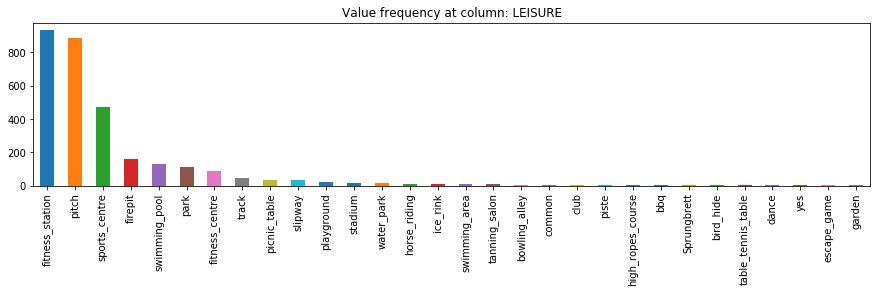

In [6]:
frequency_values(data["leisure"])

( TOURISM )
62449 valid values

information     42501
picnic_site      5130
viewpoint        4264
hotel            3413
artwork          1517
attraction       1378
guest_house      1157
museum            789
alpine_hut        556
chalet            473
apartment         327
camp_site         234
hostel            202
caravan_site      110
gallery            77
Name: tourism, dtype: int64


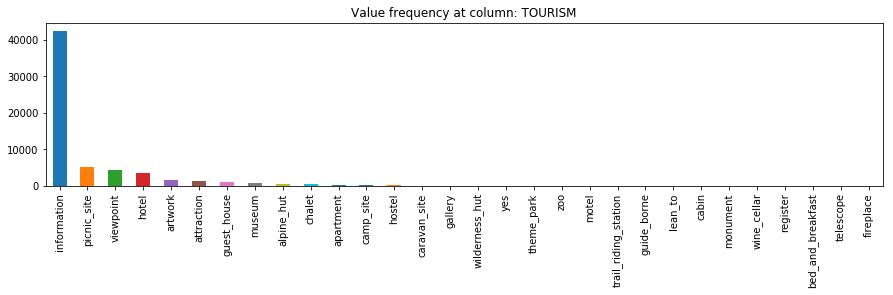

In [7]:
frequency_values(data["tourism"])

( SHOP )
39458 valid values

supermarket    3613
clothes        3459
hairdresser    3419
bakery         2604
convenience    2418
kiosk          1309
car_repair     1238
car             999
bicycle         926
florist         918
butcher         882
shoes           858
sports          833
jewelry         768
optician        722
Name: shop, dtype: int64


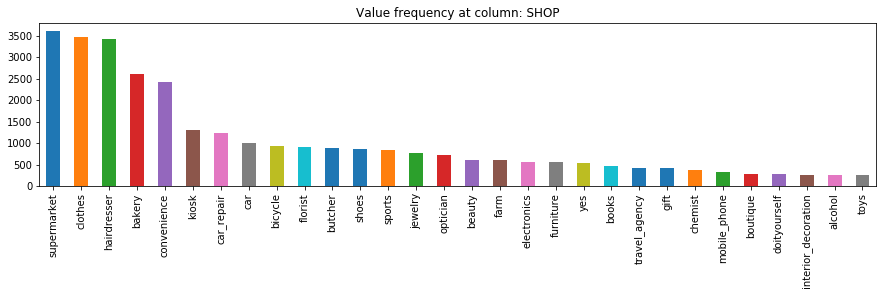

In [8]:
frequency_values(data["shop"])

( HISTORIC )
10554 valid values

wayside_cross          3809
wayside_shrine         2238
memorial               1825
boundary_stone          524
monument                412
castle                  376
yes                     364
ruins                   351
archaeological_site     325
tomb                     45
milestone                20
cannon                   18
building                 18
battlefield              18
stone                    17
Name: historic, dtype: int64


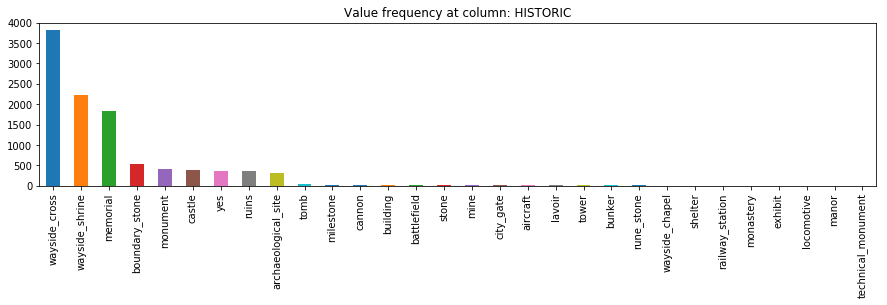

In [9]:
frequency_values(data["historic"])

( SPORT )
4674 valid values

exercise        729
table_tennis    650
climbing        500
scuba_diving    423
swimming        390
gymnastics      259
fitness         220
free_flying     118
multi           109
soccer          104
shooting        102
tennis           94
basketball       60
chess            58
skiing           58
Name: sport, dtype: int64


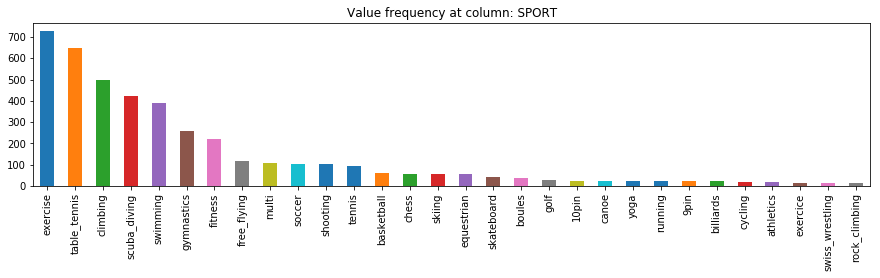

In [10]:
frequency_values(data["sport"])

( BUILDING )
4105 valid values

yes               2439
residential        184
bunker             165
roof               162
garage             142
chapel             111
garages            110
house               92
apartments          91
entrance            73
wayside_shrine      68
hut                 51
church              44
service             39
shed                35
Name: building, dtype: int64


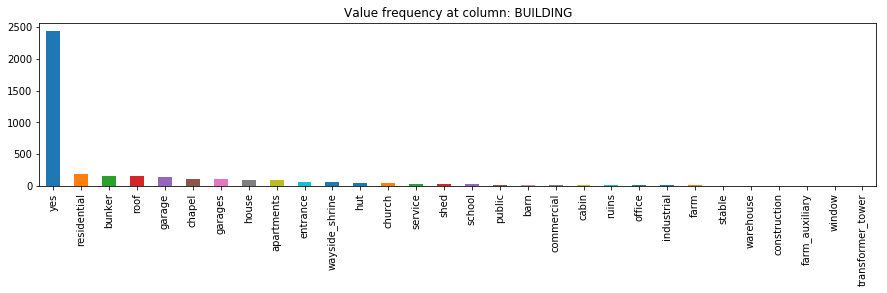

In [11]:
frequency_values(data["building"])

( OFFICE )
3879 valid values

company                    1094
government                  370
insurance                   367
estate_agent                296
it                          219
architect                   146
administrative              127
yes                         122
association                 119
educational_institution      89
lawyer                       86
employment_agency            84
ngo                          74
physician                    58
therapist                    58
Name: office, dtype: int64


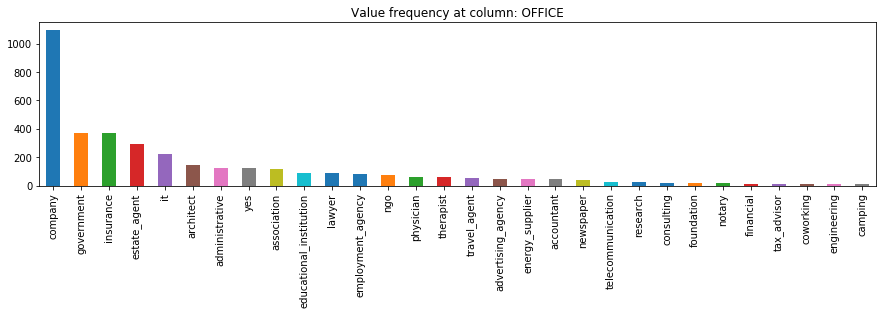

In [12]:
frequency_values(data["office"])

( ACCESS )
3875 valid values

private         1544
yes             1088
customers        413
public           295
no               291
permissive       172
destination       16
delivery          15
agricultural      10
key                4
emergency          3
permit             3
foot               3
unknown            2
members            2
Name: access, dtype: int64


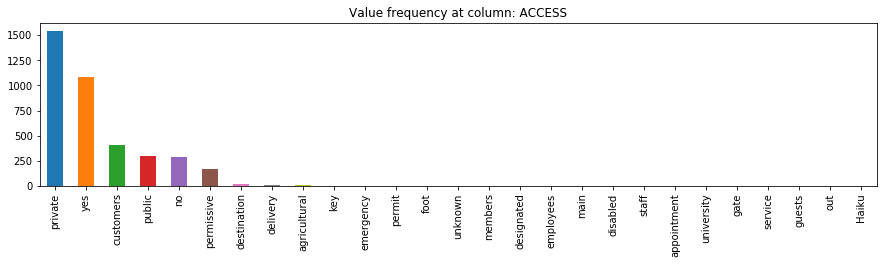

In [13]:
frequency_values(data["access"])

( RELIGION )
3852 valid values

christian          3788
muslim               34
buddhist             12
jewish                5
multifaith            4
catholic              4
hindu                 2
Christian             1
scientologist         1
jesus-zentriert       1
Name: religion, dtype: int64


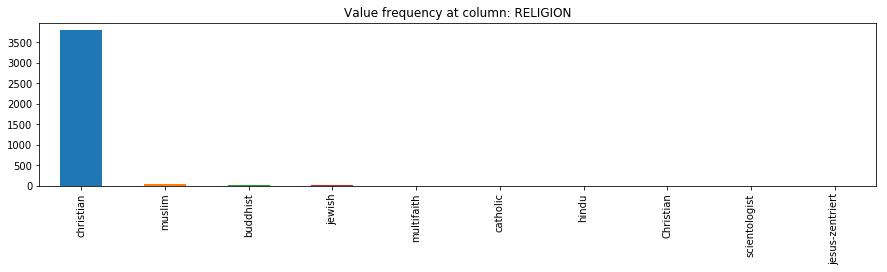

In [14]:
frequency_values(data["religion"])

( BUILDING_+_RELIGION )
204 valid values

chapel > christian            75
wayside_shrine > christian    63
church > christian            39
yes > christian               23
Statue > christian             1
chaplel > christian            1
no > multifaith                1
wayside_chapel > christian     1
Name: building_+_religion, dtype: int64


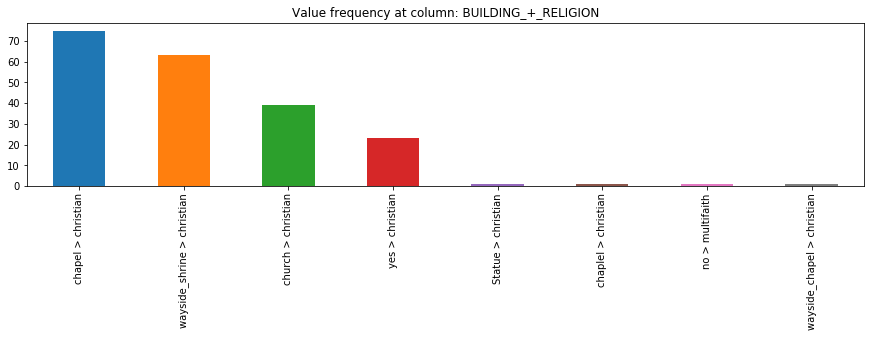

In [15]:
br = data["building"] + " > " + data["religion"]
br.name = "building_+_religion"
frequency_values(br)

( BICYCLE )
3130 valid values

yes           2566
no             533
lane            14
private         13
permissive       2
delivery         1
designated       1
Name: bicycle, dtype: int64


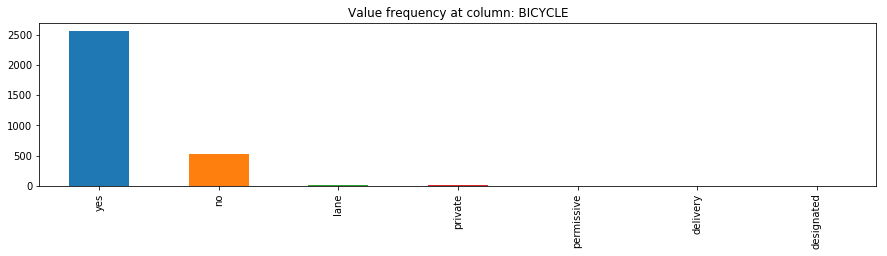

In [16]:
frequency_values(data['bicycle'])

( DENOMINATION )
2732 valid values

catholic                 2233
protestant                118
roman_catholic            112
evangelical                79
reformed                   27
pentecostal                21
new_apostolic              17
methodist                  16
romanian_orthodox          13
jehovahs_witness           10
lutheran                    8
Kreuzweg                    5
seventh_day_adventist       5
salvation_army              5
sunni                       5
Name: denomination, dtype: int64


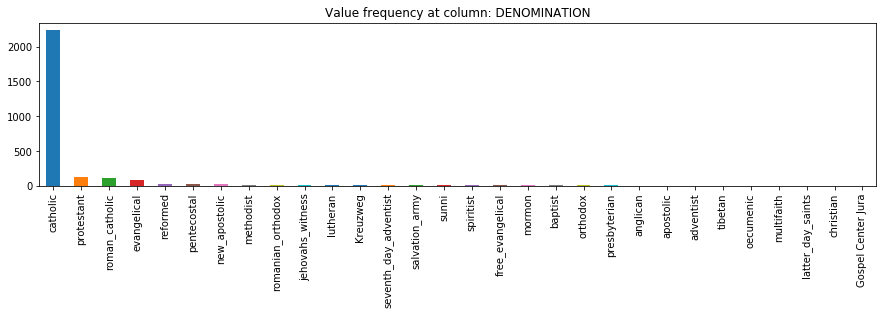

In [17]:
frequency_values(data['denomination'])

( PUBLIC_TRANSPORT )
1497 valid values

stop_position     1394
platform            61
station             36
entrance             3
stop_area            1
service_center       1
pole                 1
Name: public_transport, dtype: int64


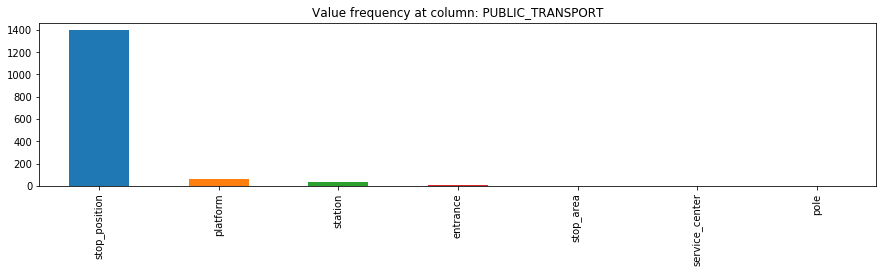

In [18]:
frequency_values(data['public_transport'])

( POWER )
920 valid values

pole                          689
terminal                      112
tower                          51
insulator                      37
substation                     19
generator                       9
cable_distribution_cabinet      3
Name: power, dtype: int64


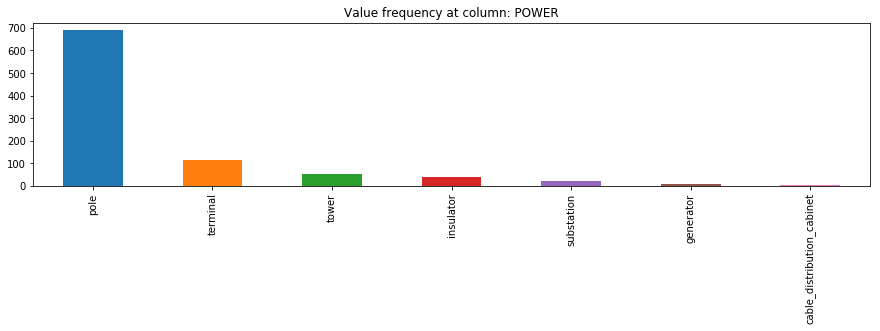

In [19]:
frequency_values(data['power'])

( NATURAL )
861 valid values

tree             391
peak             168
saddle            98
cliff             53
stone             38
spring            38
cave_entrance     22
rock              20
beach              6
scrub              4
waterfall          4
bare_rock          4
yes                3
sinkhole           2
hill               2
Name: natural, dtype: int64


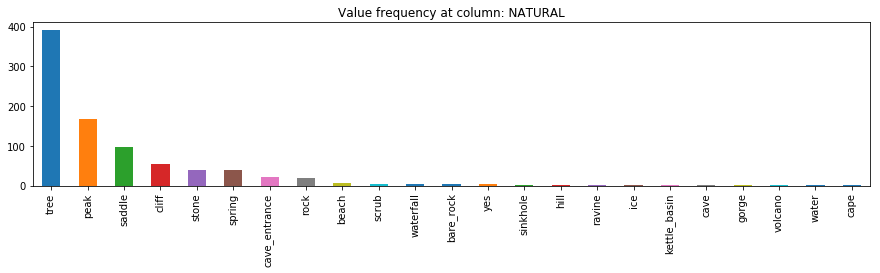

In [20]:
frequency_values(data['natural'])

( MAN_MADE )
768 valid values

surveillance         332
tower                111
buoy                  60
cross                 27
adit                  25
mast                  20
reservoir_covered     18
water_well            17
works                 17
water_tap             14
survey_point          14
flagpole              13
chimney               13
watermill             11
yes                    9
Name: man_made, dtype: int64


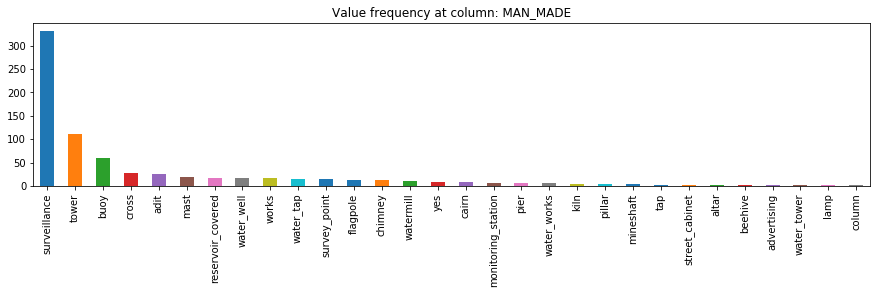

In [21]:
frequency_values(data['man_made'])

( BUILDING_+_MAN_MADE )
28 valid values

yes > tower                    8
yes > reservoir_covered        7
service > reservoir_covered    4
yes > beehive                  2
roof > water_well              1
service > street_cabinet       1
commercial > works             1
yes > water_tower              1
service > water_works          1
tower > tower                  1
yes > observatory              1
Name: building_+_man_made, dtype: int64


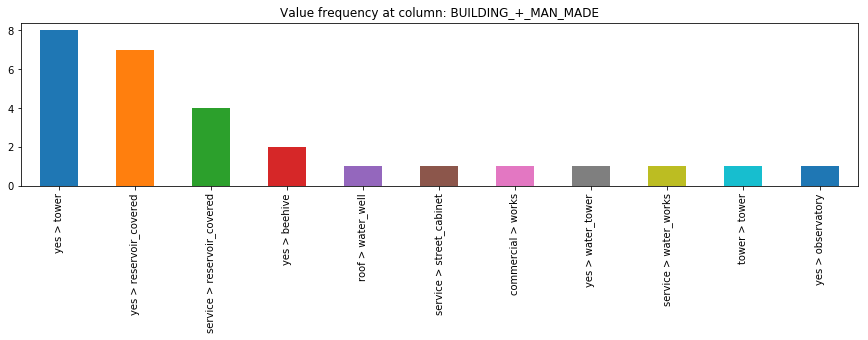

In [22]:
bmm = data["building"] + " > " + data["man_made"]
bmm.name = "building_+_man_made"
frequency_values(bmm)

( RAILWAY )
675 valid values

level_crossing     443
crossing            82
switch              51
station             24
signal              19
halt                18
buffer_stop         17
subway_entrance     12
stop                 3
milestone            1
turntable            1
water_crane          1
tram_stop            1
tram_crossing        1
yard                 1
Name: railway, dtype: int64


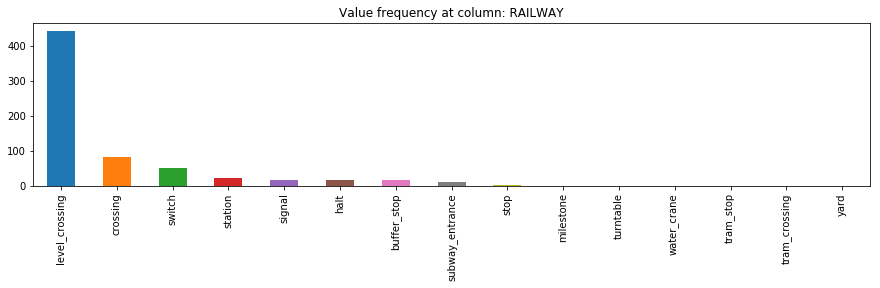

In [23]:
frequency_values(data['railway'])

( MILITARY )
614 valid values

bunker                        574
range                          15
barracks                       11
trench                          5
yes                             3
danger_area                     2
bunker_observation post         1
cannon                          1
training_area                   1
Protection Civile de Lancy      1
Name: military, dtype: int64


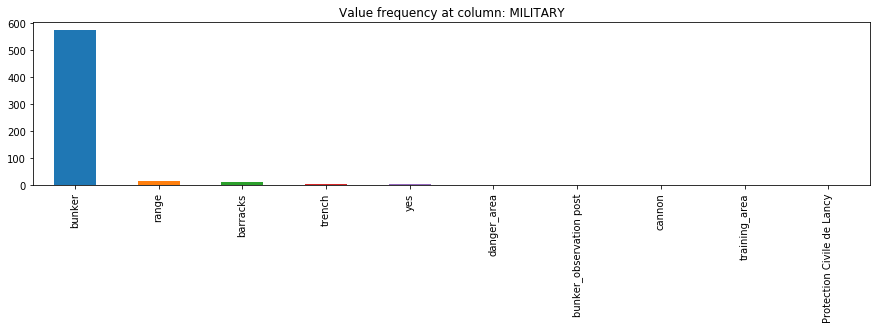

In [24]:
frequency_values(data['military'])

( PLACE )
322 valid values

locality             140
hamlet                59
isolated_dwelling     58
village               22
farm                  14
neighbourhood         12
square                11
yes                    2
suburb                 1
islet                  1
Hünenberg Zythus       1
saddle                 1
Name: place, dtype: int64


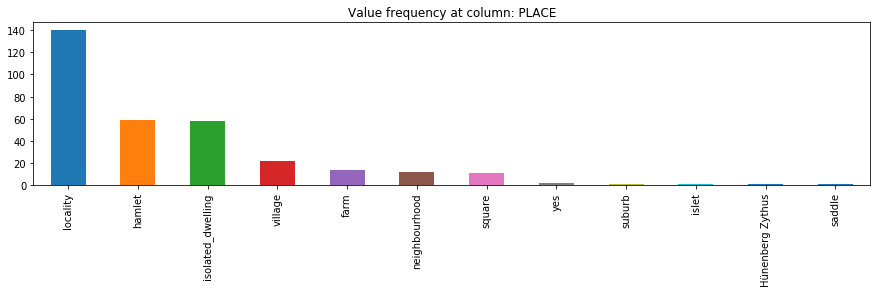

In [25]:
frequency_values(data['place'])

( AERIALWAY )
196 valid values

station    168
pylon       23
yes          5
Name: aerialway, dtype: int64


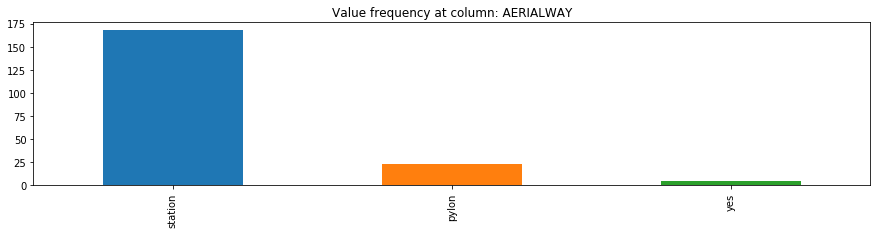

In [26]:
frequency_values(data['aerialway'])

( WATERWAY )
121 valid values

lock_gate    41
waterfall    41
weir         36
dock          1
yes           1
dam           1
Name: waterway, dtype: int64


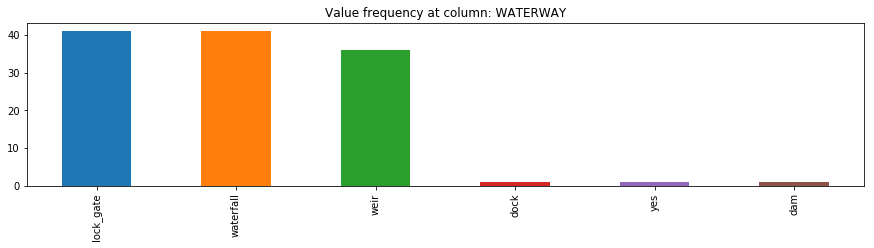

In [27]:
frequency_values(data['waterway'])

In [28]:
def new_hot_osm_pois_validation(pois):
    boolean_results = {}
    
    columns = ["amenity", "leisure", "tourism", "shop", "historic", "sport", "building", "office", 
                   "access", "religion", "bicycle", "public_transport", "power", "natural", 
                   "man_made", "railway", "military", "place", "aerialway", "waterway"]
    
    return data[data[columns].any(axis=1)]
    
r = new_hot_osm_pois_validation(data)
print(len(r))
r.head()

184106


,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,barrier,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
osm_id,,,,,,,,,,,,,,,,,,,,,
1833394793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,school,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D00A4703D0A34012441EC51B8DED011...
3216662613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D00D7A370BDDFFE2341CDCCCC8C9313...
3255532022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D007B14AE47E01B244152B81E957D0E...
1816270919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D00A4703D0A193C24415C8FC265E70D...
1816270924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,picnic_site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010100002031BF0D003D0AD7A331442441EC51B8FE080E...
